In [2]:
import geohashlite
geohashlite.encode(44.326347,69.775240, 2)

'tx'

In [11]:
geohashlite.decode('tx')

(42.1875, 73.125)

In [12]:
# GeoHash to GeoJSON
converter_1 = geohashlite.GeoJsonHasher()
x = ['tx']
converter_1.geohash_codes = x
converter_1.decode_geohash(multipolygon=True)
print(converter_1.geojson)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'geohash': ['tx']}, 'geometry': {'type': 'Polygon', 'coordinates': (((67.5, 39.375), (78.75, 39.375), (78.75, 45.0), (67.5, 45.0), (67.5, 39.375)),)}}]}


In [13]:
import geopandas as gpd

In [19]:
gdf = gpd.GeoDataFrame.from_features(converter_1.geojson)

In [64]:
def geohash_to_geometry(geohash):
    converter = geohashlite.GeoJsonHasher()
    converter.geohash_codes = [geohash]
    converter.decode_geohash(multipolygon=True)
    geo = shape(geojson.loads(json.dumps(converter.geojson['features'][0]['geometry'])))
    return geo

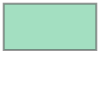

In [65]:
geohash_to_geometry('tx')

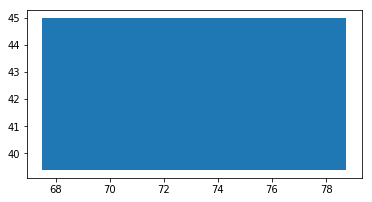

In [17]:
gdf.plot()

In [18]:
gdf

geohash                                           geometry
0    [tx]  POLYGON ((67.5 39.375, 78.75 39.375, 78.75 45,...

In [43]:
import folium
map = folium.Map(location=[42.377157,-71.236088],zoom_start=1,tiles="Stamen Toner")

folium.GeoJson(converter_1.geojson).add_to(map)
map